In [5]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Specify the path to your JSON file
file_path = '/home/newuser/Downloads/robustness_exp/q12_result.json'
sweep_file = '/home/newuser/Downloads/robustness_exp/tpch_q12_sweep.csv'
# Open and load the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

table = pd.read_csv(sweep_file,index_col=0)



In [10]:
print(table)

     receiptdate1 receiptdate2  elapsed_0  elapsed_1  elapsed_2
0      1992-01-03   1992-01-03   0.006372   0.001012   0.000931
1      1992-01-03   1992-02-02   0.231195   0.088566   0.088825
2      1992-01-03   1992-03-03   0.193612   0.157787   0.157573
3      1992-01-03   1992-04-02   0.201443   0.199245   0.201111
4      1992-01-03   1992-05-02   0.230072   0.228478   0.229138
...           ...          ...        ...        ...        ...
7391   1998-12-27   1998-08-29   0.000568   0.000582   0.000557
7392   1998-12-27   1998-09-28   0.000556   0.000566   0.000572
7393   1998-12-27   1998-10-28   0.000571   0.000582   0.000560
7394   1998-12-27   1998-11-27   0.000557   0.000567   0.000569
7395   1998-12-27   1998-12-27   0.012798   0.017295   0.013220

[7396 rows x 5 columns]


In [6]:
# Step 1: Create sorted value arrays for col1 and col2
col1_name = list(data.keys())[0]  # col1name
col2_name = list(data.keys())[1]  # col2name

# Get selectivity dictionaries for col1 and col2
col1_values = data[col1_name]
col2_values = data[col2_name]


In [7]:
deviation_log = data['deviation_log']



In [8]:
from collections import defaultdict


In [9]:
result = defaultdict(lambda: (None, float('-inf')))

# Iterate through the data to calculate maxidx and max_error
for idx1, idx2, error in deviation_log:
    current_maxidx, current_max_error = result[idx1]
    if error > current_max_error:
        result[idx1] = (idx2, error)

# Convert to a list of tuples if needed
result_list = [(idx, maxidx, max_error) for idx, (maxidx, max_error) in result.items()]

# Print the result
print(result_list)

[(0, 1, 49.14352489103114), (1, 86, 182.7397099594921), (2, 87, 2.560564988557254), (3, 88, 1.2225306912412934), (4, 91, 1.1736201155745516), (5, 92, 1.104544771288948), (6, 91, 1.0526737755442364), (7, 94, 1.0961440167569565), (8, 95, 1.0914918707212564), (9, 96, 1.1082891719309855), (10, 97, 1.1234403006608393), (11, 97, 1.0747945535095365), (12, 99, 1.0940597542891575), (13, 100, 1.068315283177649), (14, 101, 1.091292646146223), (15, 101, 1.0567614587373215), (16, 103, 1.1103928928980182), (17, 104, 1.1186639834565226), (18, 104, 1.082463309236803), (19, 104, 1.0901834006404576), (20, 105, 1.0431771324605488), (21, 108, 1.031040793034598), (22, 109, 1.0417453211004357), (23, 24, 1.0491477925492234), (24, 109, 1.0256063923676682), (25, 26, 1.0270166101450142), (26, 113, 1.0173329940645206), (27, 114, 1.0402966748653155), (28, 115, 1.0568493299645951), (29, 115, 1.0365791494920016), (30, 117, 1.0082207194015205), (31, 118, 1.0464787895214187), (32, 117, 1.0288866268088415), (33, 119, 

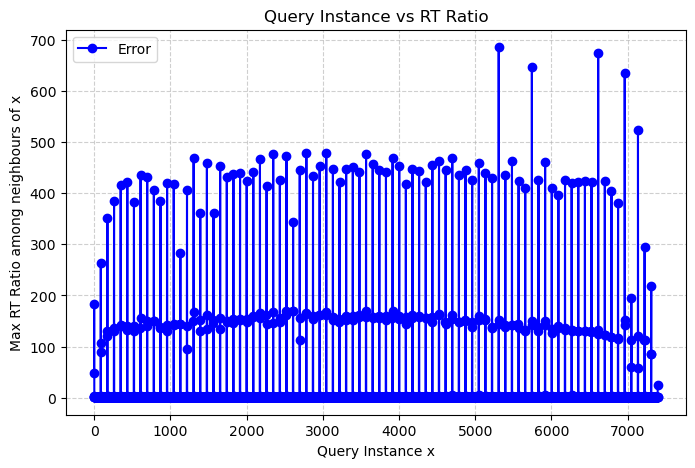

In [38]:
# Extract idx and max_error for plotting
idx_values = [entry[0] for entry in result_list]
max_errors = [entry[2] for entry in result_list]

# Create the 2D plot
plt.figure(figsize=(8, 5))
plt.plot(idx_values, max_errors, marker='o', linestyle='-', color='b', label='Error')
plt.xlabel('Query Instance x')
plt.ylabel('Max RT Ratio among neighbours of x')
plt.title('Query Instance vs RT Ratio')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

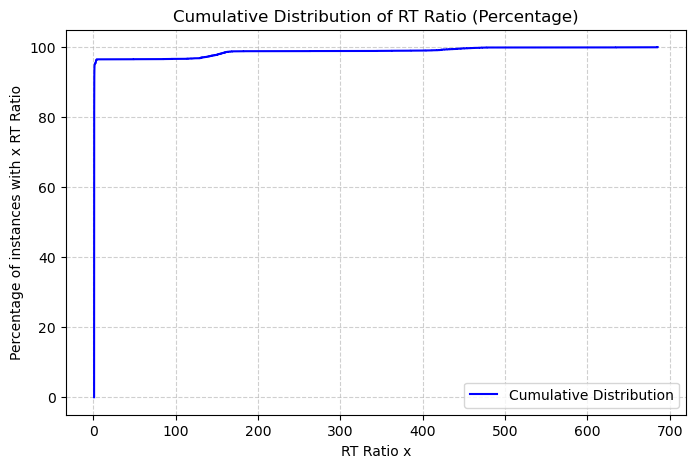

In [39]:
# Extract the errors
errors = [entry[2] for entry in result_list]

# Sort errors to compute cumulative count
sorted_errors = np.sort(errors)
cumulative_count = np.arange(1, len(sorted_errors) + 1)

# Convert cumulative count to percentage
cumulative_percentage = (cumulative_count / len(sorted_errors)) * 100

# Create the plot
plt.figure(figsize=(8, 5))
plt.step(sorted_errors, cumulative_percentage, where="post", color="b", label="Cumulative Distribution")
plt.xlabel("RT Ratio x")
plt.ylabel("Percentage of instances with x RT Ratio")
plt.title("Cumulative Distribution of RT Ratio (Percentage)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

In [18]:
import random

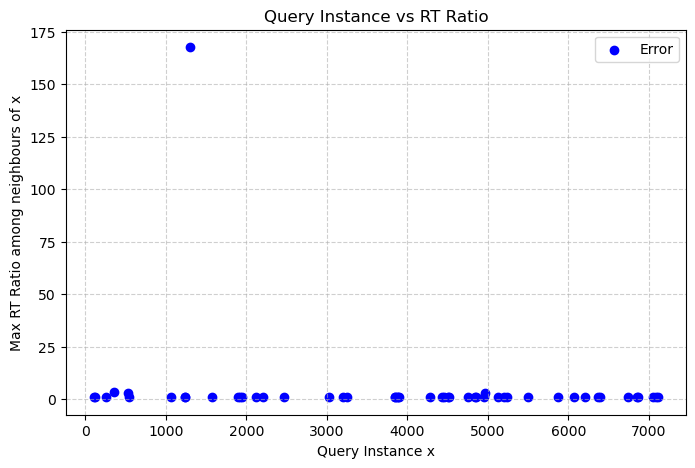

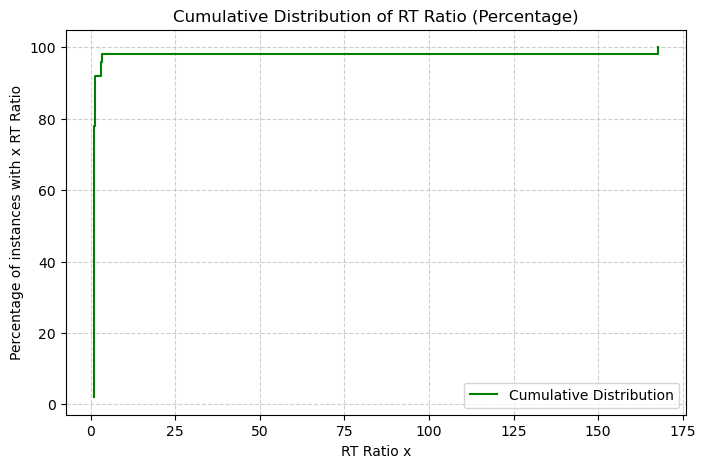

In [40]:
# Randomly select 50 indices from the result list (if you have less than 50, it will select all of them)
random_indices = random.sample(result_list, min(50, len(result_list)))
random.seed(3) 
# Extract idx and errors
idx_values = [entry[0] for entry in random_indices]
errors = [entry[2] for entry in random_indices]

# 1. First 2D plot: idx vs error
plt.figure(figsize=(8, 5))
plt.scatter(idx_values, errors, marker='o', linestyle='-', color='b', label='Error')
plt.xlabel('Query Instance x')
plt.ylabel('Max RT Ratio among neighbours of x')
plt.title('Query Instance vs RT Ratio')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# 2. Second 2D plot: Cumulative distribution of errors
# Sort the errors to compute cumulative percentage
sorted_errors = np.sort(errors)
cumulative_count = np.arange(1, len(sorted_errors) + 1)

# Convert cumulative count to percentage
cumulative_percentage = (cumulative_count / len(sorted_errors)) * 100

plt.figure(figsize=(8, 5))
plt.step(sorted_errors, cumulative_percentage, where="post", color="g", label="Cumulative Distribution")
plt.xlabel("RT Ratio x")
plt.ylabel("Percentage of instances with x RT Ratio")
plt.title("Cumulative Distribution of RT Ratio (Percentage)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

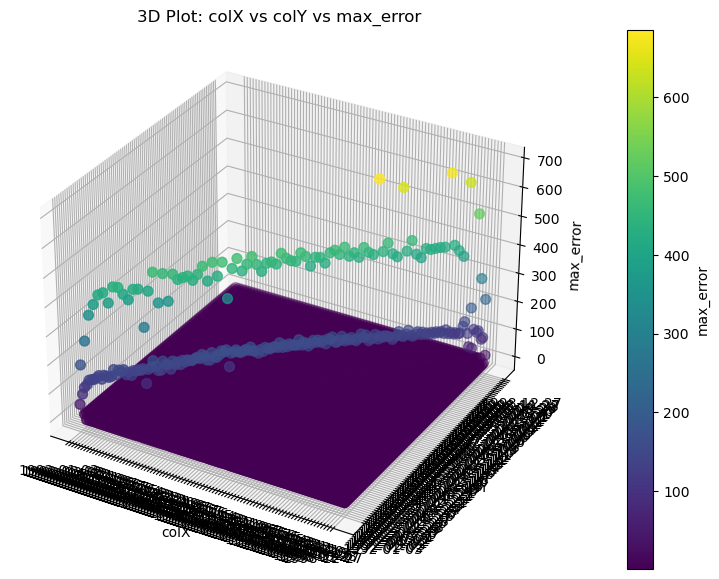

In [12]:
# Extract data for plotting
colX_values = []
colY_values = []
max_errors = []

for idx, _, max_error in result_list:
    colX_values.append(table.loc[idx, 'receiptdate1'])  # Get colX for the current idx
    colY_values.append(table.loc[idx, 'receiptdate2'])  # Get colY for the current idx
    max_errors.append(max_error)

# Map string values of colX and colY to numeric values
unique_colX = {val: i for i, val in enumerate(sorted(set(colX_values)))}
unique_colY = {val: i for i, val in enumerate(sorted(set(colY_values)))}

# Numeric representation of colX and colY for plotting
numeric_colX = [unique_colX[val] for val in colX_values]
numeric_colY = [unique_colY[val] for val in colY_values]

# Create the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
scatter = ax.scatter(numeric_colX, numeric_colY, max_errors, c=max_errors, cmap='viridis', s=50)

# Set axis ticks and labels for colX and colY
ax.set_xticks(list(unique_colX.values()))
ax.set_xticklabels(list(unique_colX.keys()))
ax.set_yticks(list(unique_colY.values()))
ax.set_yticklabels(list(unique_colY.keys()))

# Add color bar to show the error intensity
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('max_error')

# Label axes
ax.set_xlabel('colX')
ax.set_ylabel('colY')
ax.set_zlabel('max_error')
ax.set_title('3D Plot: colX vs colY vs max_error')

# Show the plot
plt.show()